Leidy valentina garcia carrillo - Unad Evalucación Final

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cargar datased del titanic

In [16]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Exploración de los datos
print(data.head())
print(data.describe())
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [20]:
# Vamos a eliminarlas temporalmente solo para visualizar la matriz de correlación
data_numeric = data.select_dtypes(include=[float, int])  # Seleccionar solo columnas numéricas


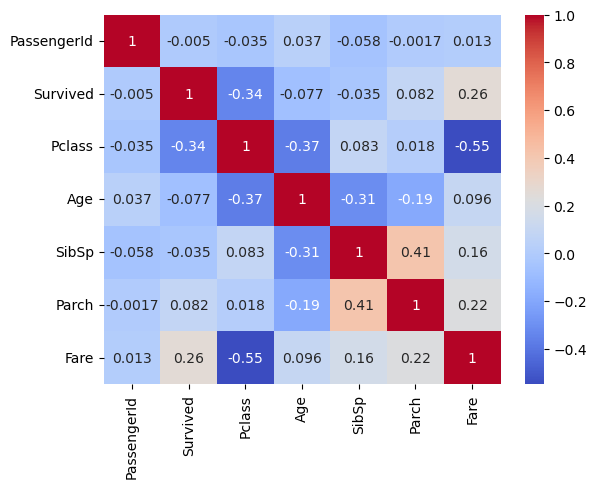

In [22]:
# Correlación para ver relaciones con el precio
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')  # Ahora solo incluye variables numéricas
plt.show()

In [34]:
# Supongamos que la columna objetivo es 'Age' y vamos a quitarla de las características (X)
X = data.drop('Age', axis=1)
y = data['Age']

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[float, int])) 

In [44]:
# División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [46]:
# Entrenar el modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predicciones
y_pred = lr_model.predict(X_test)


In [50]:
# Evaluación del desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 184.77652322070236
R²: 0.1696591701247977


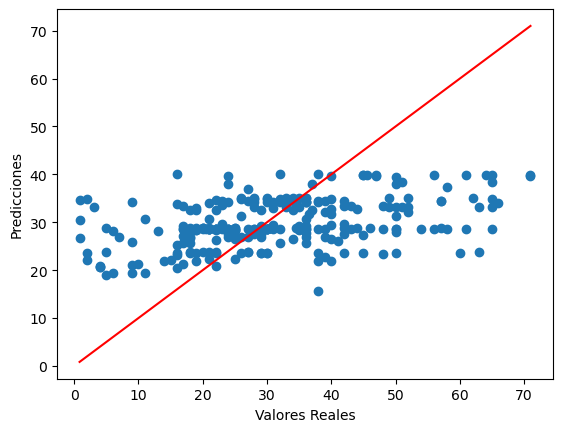

In [54]:
# Visualización de resultados
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()